In [52]:
import pandas as pd
import numpy as np
import math
import random
import bisect
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv(r'generated_datasets/statlog_with_outliers.csv')
# df = pd.read_csv(r'generated_datasets/breast-cancer_with_outliers.csv')
# df = pd.read_csv(r'generated_datasets/covtype_with_outliers.csv')
# df = pd.read_csv(r'generated_datasets/kdd99_with_outliers.csv')

In [54]:
#accessing only numeric columns
df = df._get_numeric_data()

#accessing only the result column
result = df['result']
#drop results column
df = df.drop(columns=['result'])
print(df)

      a1   a2   a3  a4  a5   a6   a7  a8  a9  a10  ...  a28  a29  a30  a31  \
0     53   56   97  90  60   56   93  87  57   60  ...   70   56   54   87   
1     53   51   75  59  53   51   75  59  53   57  ...   66   56   56   84   
2     71   77   82  64  71   81   82  68  71   77  ...   72   76   85   86   
3     84   99  100  79  84   95   96  79  71   83  ...   79   83   91  101   
4     75   95  104  87  71   95  104  87  75   91  ...   83   67   84   93   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   
4450  89  106  110  87  89  106  110  90  93  111  ...   92   92  107  113   
4451  92  108  114  94  87   99  105  90  83  103  ...   94   76  106  115   
4452  90  109  112  89  90  109  112  89  90  104  ...   87   89  106  110   
4453  84  103  109  83  88  107  113  87  88  107  ...   83   87  103  105   
4454  57   94  111  87  60  102  111  94  60  106  ...   87   67   99  109   

      a32  a33  a34  a35  a36  a37   
0      78   56   57   87 

In [55]:
#This step indicates conversion of df from csv file to dataframe
df = pd.DataFrame(df)
# checking datatypes using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a1      4455 non-null   int64
 1   a2      4455 non-null   int64
 2   a3      4455 non-null   int64
 3   a4      4455 non-null   int64
 4   a5      4455 non-null   int64
 5   a6      4455 non-null   int64
 6   a7      4455 non-null   int64
 7   a8      4455 non-null   int64
 8   a9      4455 non-null   int64
 9   a10     4455 non-null   int64
 10  a11     4455 non-null   int64
 11  a12     4455 non-null   int64
 12  a13     4455 non-null   int64
 13  a14     4455 non-null   int64
 14  a15     4455 non-null   int64
 15  a16     4455 non-null   int64
 16  a17     4455 non-null   int64
 17  a18     4455 non-null   int64
 18  a19     4455 non-null   int64
 19  a20     4455 non-null   int64
 20  a21     4455 non-null   int64
 21  a22     4455 non-null   int64
 22  a23     4455 non-null   int64
 23  a24     4455 

### IMPLEMENTING  t-Distributed Stochastic Neighbor Embedding (t-SNE) FOR THE DATASET

In [56]:
def preprocess_data(df):
    """Preprocess the data: handle missing values and standardize."""
    df_filled = df.fillna(0)  # Fill missing values with 0 or other suitable value
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_filled)
    return data_scaled

In [57]:
data_scaled = preprocess_data(df)  # Preprocess the data
print("Dataset loaded and preprocessed.")

Dataset loaded and preprocessed.


In [58]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

# Create a DataFrame for the t-SNE results
encoded_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
print("t-SNE results generated.")

t-SNE results generated.


In [59]:
#connecting the result into rdpod form
dfnew1=encoded_df['Dimension 1']
dfnew2=encoded_df['Dimension 2']

print("2D encoding generated:")
print(encoded_df.head())

dfnew=[]
for i,j in zip(dfnew1,dfnew2):
  dfnew.append([i,j])
print(dfnew)

2D encoding generated:
   Dimension 1  Dimension 2
0   -33.736927    10.177487
1   -43.885750    12.911304
2   -22.500904   -31.222467
3     5.289221   -12.388407
4    16.849344    37.938084
[[-33.7369270324707, 10.17748737335205], [-43.88574981689453, 12.911303520202637], [-22.500904083251953, -31.22246742248535], [5.289221286773682, -12.388406753540039], [16.84934425354004, 37.93808364868164], [18.078351974487305, 31.786026000976562], [-8.070515632629395, -5.355298042297363], [-55.14802932739258, -21.859420776367188], [-29.17608642578125, -30.456769943237305], [21.942371368408203, 42.069332122802734], [-15.523987770080566, -35.90601348876953], [-35.68351364135742, 48.30070877075195], [-31.30454444885254, 15.901388168334961], [6.228903293609619, 65.73937225341797], [59.137046813964844, -33.191532135009766], [63.93755340576172, -31.551376342773438], [-58.370872497558594, -26.129552841186523], [-45.597320556640625, -29.614578247070312], [1.7408236265182495, 11.31788158416748], [46.44980

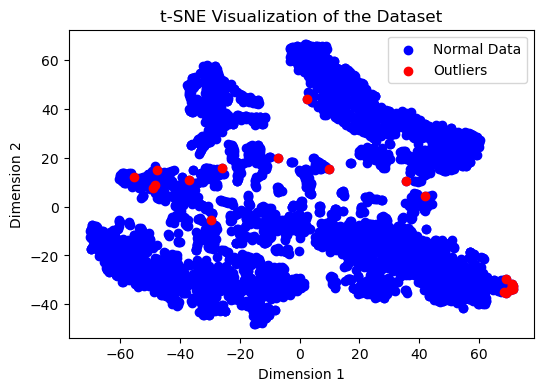

In [60]:
#from our dataset contating 19613 rows and 18 columns we take only 100 rows
# plt.scatter(df['Block'][:500],df['Lot'][:500])
outliers_points=[]
for i in range(len(result)):
    if result[i]==-1:
        outliers_points.append(dfnew[i])
        

# print(len(outliers_points))
# print(outliers_points)
plt.figure(figsize=(6, 4))
# plt.scatter(encoded_df['Dimension 1'], encoded_df['Dimension 2'])
plt.scatter(*zip(*dfnew),color='blue')
plt.scatter(*zip(*outliers_points),color='red')
plt.legend(['Normal Data','Outliers'])
plt.title("t-SNE Visualization of the Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()



# Implementing RDPOD on the reduced dataset

In [61]:
# This snippet tries all clusters and gives us best fit
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
# print(wcss)

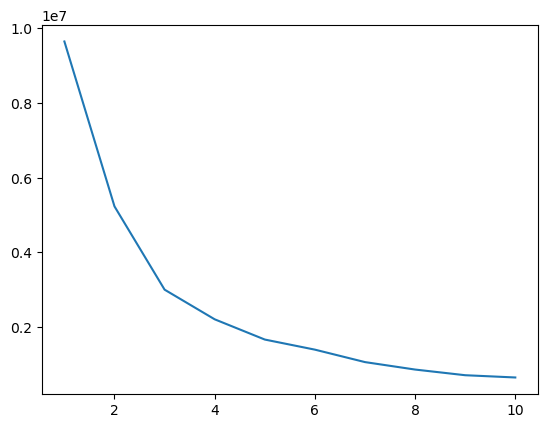

In [62]:
# plotting graph to see elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss)
plt.show()

# got bug from this code but fixed it

**he used else block to initilize the values. so for first value of every cluster it skips initilizing the value**

In [63]:
# from above we can say that no. of clusters should be 3
# In this step we will store them

from collections import OrderedDict


kmeans = KMeans(n_clusters=3).fit(dfnew)
temp_clusters = OrderedDict()
for i, label in enumerate(kmeans.labels_):
    if label not in temp_clusters:
        temp_clusters[label] = []
    temp = list(dfnew[i])
    temp_clusters[label].append(temp)
# print(temp_clusters)
clusters = OrderedDict()

for i in sorted(temp_clusters.keys()):
  clusters[i] = temp_clusters[i]

# print(clusters[0])

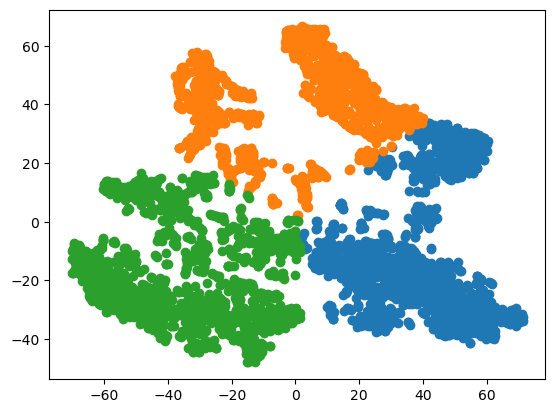

In [64]:
# plotting of cluster - 0
for i in clusters.keys():
    

    plt.scatter([j[0] for j in clusters[i]],[k[1] for k in clusters[i]])


# This is Main() Function

In [65]:
#step 1 : get centroid of clusters for this we can use bruteforce

centroid = np.array(kmeans.cluster_centers_)
print(centroid)



[[ 38.04885229  -9.16029743]
 [ -2.66710696  40.03326679]
 [-33.34474165 -16.28677363]]


In [66]:
#Let p1 be point -> [x1,y1]
#Let p2 be point -> [x2,y2]
def distance_between_two_points(p1,p2):
  return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5


In [67]:
#points array should be 2d that is in format of [[x,y],[a,b]...]
#centroid array should be 1d
#if some set of points are mapped to a centroid point then this process will be easy
#let dic = {0 : [[p1,p2],[p3,p4]] , 1 : [[p5,p6],[p7,p8]] , ....}
#let centroids array be [[c1,c2],[c3,c4],....]
#returned array will be nested list

def distance_from_centroid(dic,centroid):
  distances = []
  for i in dic.keys():
    temparr=[]
    for j in dic[i]:
      temparr.append(distance_between_two_points(j,centroid[i]))
    distances.append(temparr)
  print(temparr)
  return distances

In [68]:
#step 2 : calculate distances from centroid and store it in distances array

distances = distance_from_centroid(clusters,centroid)
print(distances)

[26.467166826241595, 31.042560499290687, 18.45707892168916, 27.536950801958216, 22.504171826882036, 14.770459773936286, 26.504600385978407, 32.25275437181849, 26.892146207257476, 18.104034514385244, 12.837646898317242, 16.273179914588063, 1.7151545041621656, 20.018778897864376, 17.843186668709325, 18.912868450717607, 18.316652898548742, 36.268822487459026, 20.168663148637386, 29.293267324814394, 30.877135045568867, 1.0243066801407181, 17.694168211785563, 28.788233140406962, 28.85036405079569, 25.481675984232343, 36.502425743645674, 24.528264338376413, 30.962541685447267, 16.63809133172959, 26.29476509348677, 25.62077037580875, 36.680527754698296, 31.24097613058294, 37.3640930743468, 31.82174915674364, 22.502786734986884, 0.9203104813126362, 34.501266099593835, 29.503231111451655, 33.50916563910652, 16.96569408664983, 36.16842097392187, 24.00945983586515, 27.358499999329936, 7.299773267534906, 19.096822756673227, 14.066749137721954, 25.37674605672368, 20.767973580724103, 31.169814061230

In [69]:
#distances array should be 2d -> [[distances array of cluster 1],[distances array of cluster 2]....]
def mean(distances):
  mean_of_distances=[]
  for i in distances:
    l = len(i)
    s = sum(i)

    mean = s/l
    mean_of_distances.append(mean)
  return mean_of_distances

In [70]:
#step 3 : calculate mean of distances

avg_distances = mean(distances)
print(avg_distances)

[24.92474610613916, 24.835938895326088, 23.91636072459406]


In [71]:
#(standard deviation)^2 = sum((occurences - mean)*(occurences-mean))/total number of ocurences
def standard_deviation(distances,mean_of_distances):
  ind = 0
  stddev=[]
  for i in distances:
    temp = 0
    for j in i:
      sq = (mean_of_distances[ind] - j)**2
      temp+=sq
    ind += 1
    stddev.append((temp/len(i))**0.5)
    temp = 0
  return stddev

In [72]:
#step 4 : calculate standard deviation of distances

std_dev = standard_deviation(distances,avg_distances)
print(std_dev)

[9.855194507858743, 6.855070280176549, 8.118783054494955]


In [73]:
#this returns treshhold values of all clusters
def treshhold(stddev,mean_of_distances):
  # ran = random.uniform(0,1)
  # ran =int(input("please enter value for alpha which should be in between 0 to 1 "))
  ran=0.5
  tresh = []

  for i,j in zip(mean_of_distances,stddev):
    temp = i + (ran * j)
    tresh.append(temp)
  return tresh

In [74]:
#step 5 : calculate tresh hold values from mean and standard deviation

tresh = treshhold(std_dev,avg_distances)
print(tresh)

[29.85234336006853, 28.26347403541436, 27.975752251841538]


In [75]:
#In this we take parameters as distances array from distances_from_centroid function
#Another parameter is tresh 1d array from treshhold function
#this function returns avg cutoff distance of each cluster
def avg_cutoff_distance(distances,tresh):
  avg_co = {}
  cn = 0
  for i,j in zip(distances,tresh):
    temparr = [k for k in i if k<=j]
    s = sum(temparr)
    l = len(temparr)
    # print(len(distances))
    temp = s/l
    avg_co[cn] = temp
    cn+=1
  return avg_co

In [76]:
#step 6 : calculate average cutoff distance

avg_cd = avg_cutoff_distance(distances,tresh)

In [77]:
#this function returns local density of a point
#this function takes point, dictionary of points denoting clusters,avg cutoff distance of that cluster
#this returns local densities array

def local_density(dic,avg_co,ind):
  temp = []
  maxi = 0
  for i in dic[ind]:
    
    cn = 0
    for j in dic[ind]:
      d = distance_between_two_points(i,j)
      maxi = max(d,maxi)
      if d < avg_co[ind]:
        cn+=1
    temp.append(cn)
  temp.append(maxi)
  print(temp)
  return temp

In [78]:
# step 7 : calculate local_density and max distance of each cluster

max_values = []
local_densities=[]
for i in clusters.keys():
  temp = local_density(clusters,avg_cd,i)
  
  m = temp[-1]
  temp.pop(-1)
  local_densities.append(temp)
  max_values.append(m)
# print(local_densities)
print(max_values)

[268, 387, 328, 367, 374, 431, 621, 544, 532, 419, 300, 363, 630, 591, 305, 421, 569, 342, 413, 632, 405, 547, 517, 532, 249, 388, 196, 567, 611, 399, 442, 392, 285, 378, 576, 277, 237, 610, 351, 568, 445, 272, 540, 469, 193, 429, 599, 612, 339, 485, 500, 362, 454, 367, 365, 472, 271, 371, 636, 533, 558, 593, 247, 587, 339, 363, 635, 255, 449, 486, 514, 495, 537, 291, 470, 361, 560, 616, 296, 378, 468, 511, 387, 368, 469, 535, 284, 405, 381, 376, 292, 387, 446, 495, 369, 350, 546, 365, 299, 617, 314, 402, 524, 626, 373, 421, 327, 422, 623, 422, 467, 375, 464, 303, 153, 243, 368, 394, 610, 300, 626, 245, 231, 317, 237, 416, 275, 495, 251, 540, 384, 353, 583, 384, 287, 205, 496, 292, 370, 392, 623, 275, 327, 180, 536, 373, 318, 340, 339, 398, 221, 512, 550, 339, 524, 284, 282, 289, 305, 402, 311, 297, 568, 625, 422, 361, 368, 368, 262, 354, 300, 374, 437, 536, 360, 306, 400, 328, 244, 554, 374, 566, 346, 594, 454, 359, 389, 628, 364, 313, 567, 556, 294, 620, 326, 570, 430, 330, 606, 270,

In [79]:
#this function takes array and target element as input and returns index of element which is greater than previous one
def next_max_density(arr, target):
  arr1 = sorted(arr)
  pos = bisect.bisect_right(arr1, target)
  
  if pos==len(arr1):
    return target
  else:
    return arr1[pos]

In [80]:
#this function takes arguments as local_density of points, clusters, maxi array.
def closest_distance_to_the_highest_density_points(local_densities,clusters,maxi,i):

  arr_of_req=[]
  for j in range(len(clusters[i])):

    next_max_density_element = next_max_density(local_densities[i],local_densities[i][j])
    next_max_density_element_index= local_densities[i].index(next_max_density_element)

    # calculating distance between the current point and the next max density point in the cluster
    temp =  distance_between_two_points(clusters[i][j],clusters[i][next_max_density_element_index])
  # if the point is the farthest in the cluster than the distance will be zero so add max distance value from the maxi arr
    if temp==0:
      arr_of_req.append(maxi[i])
    else:
      arr_of_req.append(temp)

  return arr_of_req

In [81]:
# step 8 : calculating closest distance to highest density points for each point
closest_distance = []

for i in clusters.keys():
  temp = closest_distance_to_the_highest_density_points(local_densities,clusters,max_values,i)
  closest_distance.append(temp)
print(local_densities)
print(closest_distance)
print(dfnew)


[[268, 387, 328, 367, 374, 431, 621, 544, 532, 419, 300, 363, 630, 591, 305, 421, 569, 342, 413, 632, 405, 547, 517, 532, 249, 388, 196, 567, 611, 399, 442, 392, 285, 378, 576, 277, 237, 610, 351, 568, 445, 272, 540, 469, 193, 429, 599, 612, 339, 485, 500, 362, 454, 367, 365, 472, 271, 371, 636, 533, 558, 593, 247, 587, 339, 363, 635, 255, 449, 486, 514, 495, 537, 291, 470, 361, 560, 616, 296, 378, 468, 511, 387, 368, 469, 535, 284, 405, 381, 376, 292, 387, 446, 495, 369, 350, 546, 365, 299, 617, 314, 402, 524, 626, 373, 421, 327, 422, 623, 422, 467, 375, 464, 303, 153, 243, 368, 394, 610, 300, 626, 245, 231, 317, 237, 416, 275, 495, 251, 540, 384, 353, 583, 384, 287, 205, 496, 292, 370, 392, 623, 275, 327, 180, 536, 373, 318, 340, 339, 398, 221, 512, 550, 339, 524, 284, 282, 289, 305, 402, 311, 297, 568, 625, 422, 361, 368, 368, 262, 354, 300, 374, 437, 536, 360, 306, 400, 328, 244, 554, 374, 566, 346, 594, 454, 359, 389, 628, 364, 313, 567, 556, 294, 620, 326, 570, 430, 330, 606, 270

**PLOTTING THE LOCAL DENSITY AND DISTANCE OF EACH CLUSTER VALUES BASED ON COLOR**

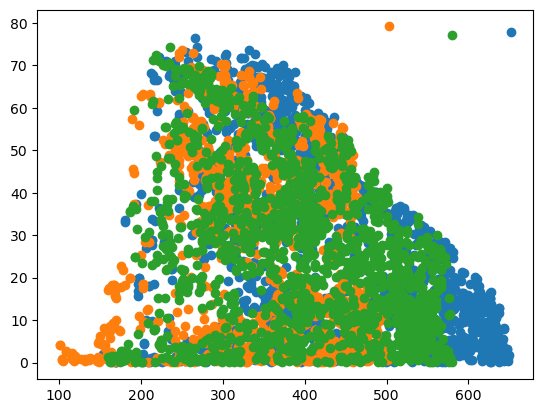

In [82]:
# step 9 : plotting points with closest_distance on x axis and local_densities on y axis

for i in clusters.keys():
  plt.scatter(local_densities[i], closest_distance[i])


**dividing the clusters group into individual clusters and assigning its respective local density and distance
to it  and then soring the clusters with refernce to the local density's and combing the sorted cluster and its values into one list i.e cluster0[ [ ] ,[ ],[ ] ]**

In [83]:
# dividing the clusters into 3 clusters 
cluster0=[]
cluster1=[]
cluster2=[]
cluster0.append(clusters[0])
cluster1.append(clusters[1])
cluster2.append(clusters[2])

cluster0_local_density=local_densities[0]
cluster1_local_density=local_densities[1]
cluster2_local_density=local_densities[2]

cluster0_closest_distance=closest_distance[0]
cluster1_closest_distance=closest_distance[1]
cluster2_closest_distance=closest_distance[2]

# print(cluster0[0])
# print(cluster0_local_density)
# print(cluster0_closest_distance)


# sorting the points in the cluster based on local density and also sorting the closest distance to the highest density points with refrerence to the local density
def bubble_sort(arr,cluster,closest_distance):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                cluster[j], cluster[j+1] = cluster[j+1], cluster[j]
                closest_distance[j], closest_distance[j+1] = closest_distance[j+1], closest_distance[j]

# Sort cluster0_local_density using bubble sort
bubble_sort(cluster0_local_density,cluster0[0],cluster0_closest_distance)

# Sort cluster1_local_density using bubble sort
bubble_sort(cluster1_local_density,cluster1[0],cluster1_closest_distance)

# Sort cluster2_local_density using bubble sort
bubble_sort(cluster2_local_density,cluster2[0],cluster2_closest_distance)

# print(cluster0[0])
# print(cluster0_local_density)
# print(cluster0_closest_distance)

# merging local densities and closest distances of all clusters
cluster0.append(cluster0_local_density)
cluster0.append(cluster0_closest_distance)
cluster1.append(cluster1_local_density)
cluster1.append(cluster1_closest_distance)
cluster2.append(cluster2_local_density)
cluster2.append(cluster2_closest_distance)
print(cluster0)
print(cluster1)
print(cluster2)
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))





[[[22.71344757080078, 17.783185958862305], [23.302534103393555, 19.80503273010254], [24.43041229248047, 19.61714744567871], [24.42439842224121, 19.718265533447266], [24.338600158691406, 19.92327117919922], [24.504167556762695, 20.001110076904297], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [1.985742449760437, -4.4510498046875], [27.012659072875977, 22.857839584350586], [2.0465877056121826, -4.398579120635986], [27.051788330078125, 22.67110252380371], [2.0414514541625977, -5.01131534576416], [2.2136905193328857, -7.594184875488281], [2.530280351638794, -3.967059850692749], [14.41983413696289, 6.396566390991211], [14.41210651397705, 6.285357475280762], [2.1228349208831787, -9.310881614685059], [27.373456954956055, 21.1927433013916], [26.316905975341797, 19.893016815185547], [26.617111206054688, 18.26660919189453], [26.318622589111328, 19.79391098022461], [27.32653045654297, 21.551067352294922], [27.36956024169922, 21.68482208251953], [26.921379089

**TAKING THE PROBABLE OUTLIERS COUNT FOR EACH CLUSTER FROM THE USER AND SPLITTING THE CLUSTER**

In [84]:
# finding  the outliers in each cluster
outlier_count=int(input("Enter the number of outliers you want to find in each cluster: "))
outliers_in_cluster0=[]
outliers_in_cluster1=[]
outliers_in_cluster2=[]
# storing the outliers in the cluster and its local density and closest distance

outliers_in_cluster0.append(cluster0[0][:outlier_count]) #for cluster points
outliers_in_cluster0.append(cluster0[1][:outlier_count]) #for local density 
outliers_in_cluster0.append(cluster0[2][:outlier_count]) #for closest distance

# similarly for cluster1 
outliers_in_cluster1.append(cluster1[0][:outlier_count])
outliers_in_cluster1.append(cluster1[1][:outlier_count])
outliers_in_cluster1.append(cluster1[2][:outlier_count])

# similarly for cluster2
outliers_in_cluster2.append(cluster2[0][:outlier_count])
outliers_in_cluster2.append(cluster2[1][:outlier_count])
outliers_in_cluster2.append(cluster2[2][:outlier_count])

print(outliers_in_cluster0)
print(outliers_in_cluster1)
print(outliers_in_cluster2)

[[[22.71344757080078, 17.783185958862305], [23.302534103393555, 19.80503273010254], [24.43041229248047, 19.61714744567871], [24.42439842224121, 19.718265533447266], [24.338600158691406, 19.92327117919922], [24.504167556762695, 20.001110076904297], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [1.985742449760437, -4.4510498046875], [27.012659072875977, 22.857839584350586], [2.0465877056121826, -4.398579120635986], [27.051788330078125, 22.67110252380371], [2.0414514541625977, -5.01131534576416], [2.2136905193328857, -7.594184875488281], [2.530280351638794, -3.967059850692749], [14.41983413696289, 6.396566390991211], [14.41210651397705, 6.285357475280762], [2.1228349208831787, -9.310881614685059], [27.373456954956055, 21.1927433013916], [26.316905975341797, 19.893016815185547], [26.617111206054688, 18.26660919189453], [26.318622589111328, 19.79391098022461], [27.32653045654297, 21.551067352294922], [27.36956024169922, 21.68482208251953], [26.921379089

**PLOTING THE GRAPH FOR MERGER LOCAL DENSITY AND DISTANCE FORM INDIVIDUAL CLUSTERS**

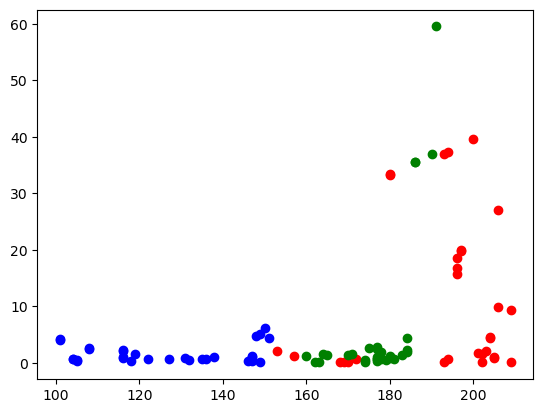

In [85]:
# ploting them into the graph
plt.scatter(outliers_in_cluster0[1],outliers_in_cluster0[2],color='red',label='outliers in cluster 0')
plt.scatter(outliers_in_cluster1[1],outliers_in_cluster1[2],color='blue',label='outliers in cluster 1')
plt.scatter(outliers_in_cluster2[1],outliers_in_cluster2[2],color='green',label='outliers in cluster 2')

**PLOTING THE GRAPH FOR DATA POINTS OF PROBABLE OUTLIERS WITH IN THE INDIVIDUAL CLUSTER**

**REMEMBER CLUSTERS WILL INTERCHANGE SOME**

**CLUSTER 1**

[[22.71344757080078, 17.783185958862305], [23.302534103393555, 19.80503273010254], [24.43041229248047, 19.61714744567871], [24.42439842224121, 19.718265533447266], [24.338600158691406, 19.92327117919922], [24.504167556762695, 20.001110076904297], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [1.985742449760437, -4.4510498046875], [27.012659072875977, 22.857839584350586], [2.0465877056121826, -4.398579120635986], [27.051788330078125, 22.67110252380371], [2.0414514541625977, -5.01131534576416], [2.2136905193328857, -7.594184875488281], [2.530280351638794, -3.967059850692749], [14.41983413696289, 6.396566390991211], [14.41210651397705, 6.285357475280762], [2.1228349208831787, -9.310881614685059], [27.373456954956055, 21.1927433013916], [26.316905975341797, 19.893016815185547], [26.617111206054688, 18.26660919189453], [26.318622589111328, 19.79391098022461], [27.32653045654297, 21.551067352294922], [27.36956024169922, 21.68482208251953], [26.9213790893

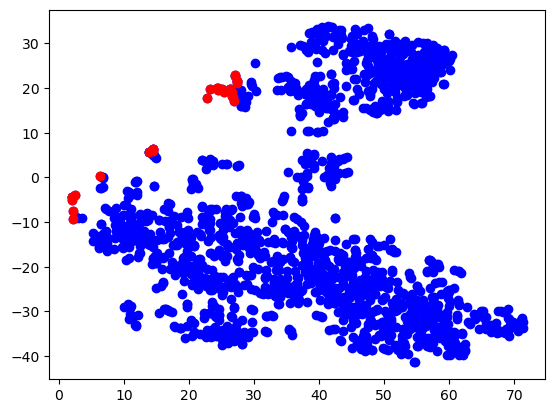

In [86]:
plt.scatter([i[0] for i in cluster0[0]],[i[1] for i in cluster0[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster0[0]],[i[1] for i in outliers_in_cluster0[0]],color='red')
print(outliers_in_cluster0[0])

**MERGING ALL CLUSTERS INTO SINGLE CLUSTER**

**CLUSTER 2**

[[0.7082709670066833, 2.2704262733459473], [0.5804611444473267, 2.181864023208618], [3.7966740131378174, 4.975891590118408], [3.6661932468414307, 5.046640872955322], [3.252732276916504, 5.497025012969971], [3.402026414871216, 5.725031852722168], [3.3520729541778564, 5.99467658996582], [3.31428599357605, 5.768199443817139], [3.6194729804992676, 8.386922836303711], [2.179720401763916, 7.919206619262695], [3.618420362472534, 8.164945602416992], [2.0686469078063965, 7.822945594787598], [3.7545924186706543, 9.256300926208496], [3.6883654594421387, 9.642008781433105], [2.088453531265259, 9.188871383666992], [2.040677309036255, 9.947421073913574], [2.331737518310547, 10.620269775390625], [2.747279167175293, 11.38853931427002], [3.1590797901153564, 11.581341743469238], [2.413041830062866, 11.349831581115723], [1.7408236265182495, 11.31788158416748], [1.4848872423171997, 12.405631065368652], [1.6258749961853027, 12.691588401794434], [2.467853546142578, 13.083841323852539], [1.7468599081039429, 

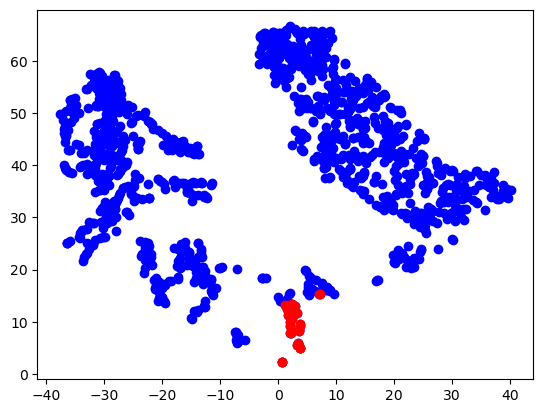

In [87]:
plt.scatter([i[0] for i in cluster1[0]],[i[1] for i in cluster1[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster1[0]],[i[1] for i in outliers_in_cluster1[0]],color='red')
print(outliers_in_cluster1[0])

**CLUSTER 3**

[[-60.17897033691406, 12.944134712219238], [-59.2985954284668, 13.818119049072266], [-59.08648681640625, 13.89311695098877], [-58.93193435668945, 13.82827377319336], [-59.99568176269531, 12.614307403564453], [-60.2773551940918, 11.309880256652832], [-59.314300537109375, 12.369446754455566], [-57.794193267822266, 13.038307189941406], [-57.664649963378906, 13.2047758102417], [-57.98442840576172, 12.884428977966309], [-59.34879684448242, 10.598191261291504], [-59.06996154785156, 11.214045524597168], [-59.264984130859375, 10.984587669372559], [-58.627567291259766, 12.066507339477539], [-57.28951644897461, 13.395315170288086], [-57.08708190917969, 13.703838348388672], [-58.72980499267578, 11.376267433166504], [-59.43266296386719, 10.423935890197754], [-58.510337829589844, 12.07368278503418], [-57.94424057006836, 12.261970520019531], [-58.37432861328125, 12.139723777770996], [-57.29545974731445, 12.780665397644043], [-56.89944076538086, 13.28134822845459], [-57.694313049316406, 12.1425962448

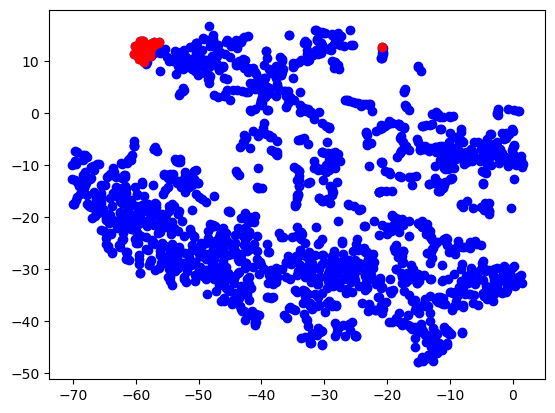

In [88]:
plt.scatter([i[0] for i in cluster2[0]],[i[1] for i in cluster2[0]],color='blue')
plt.scatter([i[0] for i in outliers_in_cluster2[0]],[i[1] for i in outliers_in_cluster2[0]],color='red')
print(outliers_in_cluster2[0])

**MERGING ALL THE PROBABLE OUTLIERS FROM DIFFERENT CLUSTERS INTO ONE CLUSTER**

In [89]:
try:
    # merging the outliers of all clusters
    merged_outliers=[]
    merged_outliers=outliers_in_cluster0
    for i in range(outlier_count):
        merged_outliers[0].append(outliers_in_cluster1[0][i])
        merged_outliers[1].append(outliers_in_cluster1[1][i])
        merged_outliers[2].append(outliers_in_cluster1[2][i])
    for i in range(outlier_count):
        merged_outliers[0].append(outliers_in_cluster2[0][i])
        
        merged_outliers[1].append(outliers_in_cluster2[1][i])
        merged_outliers[2].append(outliers_in_cluster2[2][i])
    print(merged_outliers)
except:
    raise IndexError("Error select the range within the max points in the cluster")
    
    


    

[[[22.71344757080078, 17.783185958862305], [23.302534103393555, 19.80503273010254], [24.43041229248047, 19.61714744567871], [24.42439842224121, 19.718265533447266], [24.338600158691406, 19.92327117919922], [24.504167556762695, 20.001110076904297], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [1.985742449760437, -4.4510498046875], [27.012659072875977, 22.857839584350586], [2.0465877056121826, -4.398579120635986], [27.051788330078125, 22.67110252380371], [2.0414514541625977, -5.01131534576416], [2.2136905193328857, -7.594184875488281], [2.530280351638794, -3.967059850692749], [14.41983413696289, 6.396566390991211], [14.41210651397705, 6.285357475280762], [2.1228349208831787, -9.310881614685059], [27.373456954956055, 21.1927433013916], [26.316905975341797, 19.893016815185547], [26.617111206054688, 18.26660919189453], [26.318622589111328, 19.79391098022461], [27.32653045654297, 21.551067352294922], [27.36956024169922, 21.68482208251953], [26.921379089

**SORTING ALL THE PROBABLE OUTLIERS BASED ON THE LOCAL DENSITY**

In [90]:
# sorting the merged outliers based on local density
for i in range(len(merged_outliers[1])):
    for j in range(i+1,len(merged_outliers[1])):
        if merged_outliers[1][i]>merged_outliers[1][j]:  #[1] is local density
            merged_outliers[1][i],merged_outliers[1][j]=merged_outliers[1][j],merged_outliers[1][i]
            merged_outliers[0][i],merged_outliers[0][j]=merged_outliers[0][j],merged_outliers[0][i]
            merged_outliers[2][i],merged_outliers[2][j]=merged_outliers[2][j],merged_outliers[2][i]
print("After sorting based on local density")
print(merged_outliers)



After sorting based on local density
[[[0.7082709670066833, 2.2704262733459473], [0.5804611444473267, 2.181864023208618], [3.7966740131378174, 4.975891590118408], [3.6661932468414307, 5.046640872955322], [3.252732276916504, 5.497025012969971], [3.402026414871216, 5.725031852722168], [3.3520729541778564, 5.99467658996582], [3.31428599357605, 5.768199443817139], [3.6194729804992676, 8.386922836303711], [2.179720401763916, 7.919206619262695], [3.618420362472534, 8.164945602416992], [2.0686469078063965, 7.822945594787598], [3.7545924186706543, 9.256300926208496], [3.6883654594421387, 9.642008781433105], [2.088453531265259, 9.188871383666992], [2.040677309036255, 9.947421073913574], [2.331737518310547, 10.620269775390625], [2.747279167175293, 11.38853931427002], [3.1590797901153564, 11.581341743469238], [2.413041830062866, 11.349831581115723], [1.7408236265182495, 11.31788158416748], [1.4848872423171997, 12.405631065368652], [1.6258749961853027, 12.691588401794434], [2.467853546142578, 13.0

In [91]:
#plotting the merged outliers to verify with previous individual local clusters based on local density and closest distance
# plt.scatter(merged_outliers[1],merged_outliers[2],color='blue',label='merged outliers')

**PROBABLE OUTLIERS WITH IN THE DATASET**

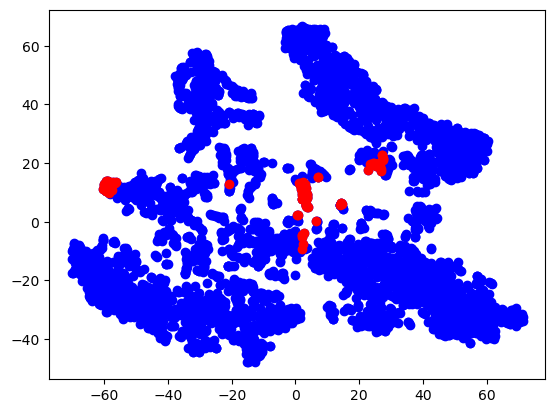

In [92]:
# plotting the outliers point not density and closest distance
plt.scatter(dfnew1,dfnew2,color='blue',label='normal points')

plt.scatter([i[0] for i in merged_outliers[0]],[j[1] for j in merged_outliers[0]],color='red',label='outliers')

**PERFORMING ODF ON THE MERGED POINTS**

In [93]:
# mean calculation for the merged outliers closest distance
def mean(arr):
    return sum(arr)/len(arr)

In [94]:
# variance calculation for the merged outliers closest distance
def variance(arr):
    mean1=mean(arr)
    variance1=sum((x-mean1)**2 for x in arr)/len(arr)
    return variance1

In [95]:
# function calculation for gaussian distribution function calculation
def gaussain_distribution_function_calculation(x,mean,variance):
    return (1/(math.sqrt(2*math.pi*variance)))*math.exp(-((x-mean)**2)/(2*variance))

In [96]:
# finding the outliers factor using gaaussain distribution function
def gaussain_distribution_function(density,distance):
    outliers_factor=[]
    for i in range(len(density)):
        outliers_factor.append((density[i]*gaussain_distribution_function_calculation(distance[i],mean(distance),variance(distance))))
    return outliers_factor


**CALLING THE ODF FUNCTION**

In [97]:
outlier_factor=gaussain_distribution_function(merged_outliers[1],merged_outliers[2])
print(outlier_factor)

[3.2863749805078246, 3.294963156420351, 3.06970466636993, 3.051802564756958, 3.0677055366746324, 3.0369208206740748, 3.3776114113037354, 3.3997051778784626, 3.4413968701733384, 3.5903479033256267, 3.4711126203994076, 3.6067919062036733, 3.430411399908105, 3.6345299381685443, 3.6019903407499028, 3.74549539389153, 3.8854187592420506, 3.847881262441257, 3.9892221225984064, 4.0010310479915745, 4.1322139141225795, 4.231040243086659, 4.42994211930358, 4.273946187668386, 4.4016475863386395, 4.8604243707939006, 4.295442972248121, 4.914659529963618, 4.9864380665851975, 4.940347699990482, 4.741507539640024, 4.7057955888713705, 4.813292718300376, 4.675339635142719, 4.692179244353274, 5.000495534914097, 4.981000811085469, 4.821694693002224, 4.8767667412660645, 4.897045442108656, 5.150129838216913, 5.222352033520257, 5.056487217636671, 5.026048562539342, 5.071759133981012, 5.512721646711524, 5.274856580174877, 5.142389647481334, 5.2051204753319595, 5.212545545029121, 5.547247357634957, 5.6036685778

**merging the outlier_factor with the merged outliers**

In [98]:
merged_outliers.append(outlier_factor)
print(merged_outliers)
print(len(merged_outliers))

[[[0.7082709670066833, 2.2704262733459473], [0.5804611444473267, 2.181864023208618], [3.7966740131378174, 4.975891590118408], [3.6661932468414307, 5.046640872955322], [3.252732276916504, 5.497025012969971], [3.402026414871216, 5.725031852722168], [3.3520729541778564, 5.99467658996582], [3.31428599357605, 5.768199443817139], [3.6194729804992676, 8.386922836303711], [2.179720401763916, 7.919206619262695], [3.618420362472534, 8.164945602416992], [2.0686469078063965, 7.822945594787598], [3.7545924186706543, 9.256300926208496], [3.6883654594421387, 9.642008781433105], [2.088453531265259, 9.188871383666992], [2.040677309036255, 9.947421073913574], [2.331737518310547, 10.620269775390625], [2.747279167175293, 11.38853931427002], [3.1590797901153564, 11.581341743469238], [2.413041830062866, 11.349831581115723], [1.7408236265182495, 11.31788158416748], [1.4848872423171997, 12.405631065368652], [1.6258749961853027, 12.691588401794434], [2.467853546142578, 13.083841323852539], [1.7468599081039429,

**SORTING THE ARRAY WITH REFERNCE TO OUTLIERS_FACTOR**

In [99]:
# soring the merged outliers based on the outliers factor
for i in range(len(merged_outliers[3])):
    for j in range(i+1,len(merged_outliers[3])):
        if merged_outliers[3][i]>merged_outliers[3][j]:  #[3] is outliers factor
            merged_outliers[3][i],merged_outliers[3][j]=merged_outliers[3][j],merged_outliers[3][i]
            merged_outliers[0][i],merged_outliers[0][j]=merged_outliers[0][j],merged_outliers[0][i]
            merged_outliers[1][i],merged_outliers[1][j]=merged_outliers[1][j],merged_outliers[1][i]
            merged_outliers[2][i],merged_outliers[2][j]=merged_outliers[2][j],merged_outliers[2][i]
print("After sorting based on outliers factor")
print(merged_outliers)
print(len(merged_outliers))

After sorting based on outliers factor
[[[-57.702735900878906, 10.913603782653809], [2.1228349208831787, -9.310881614685059], [27.051788330078125, 22.67110252380371], [-20.837547302246094, 12.746188163757324], [27.012659072875977, 22.857839584350586], [-56.46586227416992, 13.345666885375977], [-56.323570251464844, 13.600686073303223], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [26.786596298217773, 17.965930938720703], [3.402026414871216, 5.725031852722168], [3.6661932468414307, 5.046640872955322], [3.252732276916504, 5.497025012969971], [3.7966740131378174, 4.975891590118408], [0.7082709670066833, 2.2704262733459473], [0.5804611444473267, 2.181864023208618], [3.3520729541778564, 5.99467658996582], [3.31428599357605, 5.768199443817139], [3.7545924186706543, 9.256300926208496], [3.6194729804992676, 8.386922836303711], [3.618420362472534, 8.164945602416992], [14.41983413696289, 6.396566390991211], [14.41210651397705, 6.285357475280762], [2.17972040

**TAKING TOP N PROBABLE OUTLIERS INPUT FROM THE USER**

In [100]:
global_out_liers_count=int(input("Their are total "+str(len(merged_outliers[0]))+" probable outliers in the dataset ,please enter the number of outliers you want to select as global outliers: "))


# Result analysis

**TAKING THE GLOBAL OUTLIERS FROM THE DATASET**

[[-57.702735900878906, 10.913603782653809], [2.1228349208831787, -9.310881614685059], [27.051788330078125, 22.67110252380371], [-20.837547302246094, 12.746188163757324], [27.012659072875977, 22.857839584350586], [-56.46586227416992, 13.345666885375977], [-56.323570251464844, 13.600686073303223], [25.130348205566406, 19.807024002075195], [25.381044387817383, 19.085107803344727], [26.786596298217773, 17.965930938720703], [3.402026414871216, 5.725031852722168], [3.6661932468414307, 5.046640872955322], [3.252732276916504, 5.497025012969971], [3.7966740131378174, 4.975891590118408], [0.7082709670066833, 2.2704262733459473], [0.5804611444473267, 2.181864023208618], [3.3520729541778564, 5.99467658996582], [3.31428599357605, 5.768199443817139], [3.7545924186706543, 9.256300926208496], [3.6194729804992676, 8.386922836303711]]


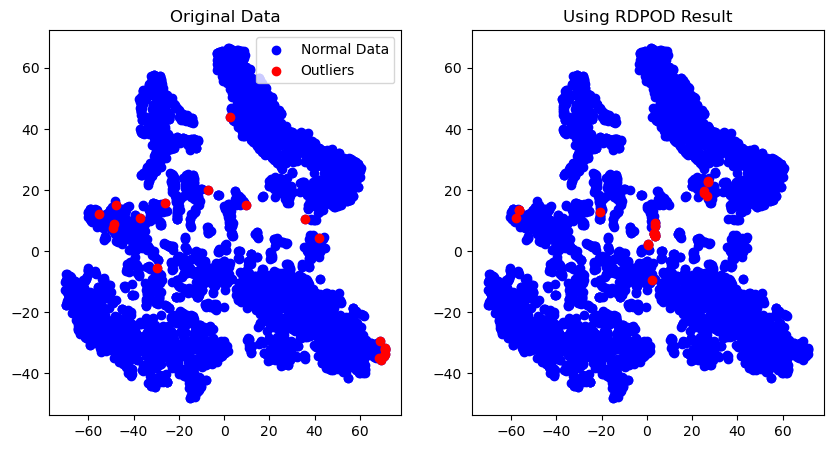

In [101]:
global_out_liers=merged_outliers[0][:global_out_liers_count]
print(global_out_liers)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.scatter(*zip(*dfnew),color='blue')
plt.scatter(*zip(*outliers_points),color='red')
plt.legend(['Normal Data','Outliers'])
plt.subplot(1, 2, 2)
plt.title('Using RDPOD Result')
plt.scatter(dfnew1,dfnew2,color='blue',label='normal points')
plt.scatter([i[0] for i in global_out_liers],[j[1] for j in global_out_liers],color='red',label='global outliers')
plt.show()

# Calculating Accuracy

In [102]:
# calculating accuracy using global outliers and original outliers
def accuracy(global_outliers,outliers):
    count=0
    for i in global_outliers:
        if i in outliers:
            count+=1
    return count/len(global_outliers)

# calculating precision and recall
def precision_recall(global_outliers,outliers):
    true_positive=0
    false_positive=0
    false_negative=0
    for i in global_outliers:
        if i in outliers:
            true_positive+=1
        else:
            false_positive+=1
    for i in outliers:
        if i not in global_outliers:
            false_negative+=1
            
    precision=true_positive/(true_positive+false_positive)
    recall=true_positive/(true_positive+false_negative)
    return precision,recall

# calculating f1 score
def f1_score(precision,recall):
    return 2*((precision*recall)/(precision+recall))

precision,recall=precision_recall(global_out_liers,outliers_points)
print("Accuracy of the model is : ",accuracy(global_out_liers,outliers_points))    
print("Precision of the model is : ",precision)
print("Recall of the model is : ",recall)
print("F1 score of the model is : ",f1_score(precision,recall))


Accuracy of the model is :  0.0
Precision of the model is :  0.0
Recall of the model is :  0.0


ZeroDivisionError: float division by zero